In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('newtrial - Sheet 1 - 01_District_wise_crim 2.csv')

# View the first few rows of the dataset
data


,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,...,4,118,0,19,1,9,0,0,323,658
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,...,2,97,0,17,3,4,0,0,328,608
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,...,8,110,0,9,2,7,0,0,318,644
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,...,9,105,0,6,3,5,0,6,387,748
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,...,6,79,0,11,1,5,0,3,362,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,WEST BENGAL,2008,1811,1732,488,2263,0,2263,2332,1907,...,150,9033,451,2396,94,13663,5,3789,38177,105419
416,WEST BENGAL,2009,2068,2119,931,2336,0,2336,2750,2187,...,344,11196,506,1942,108,16112,5,3623,38776,113036
417,WEST BENGAL,2010,2398,2111,630,2311,0,2311,3345,2764,...,331,12764,507,2465,163,17796,8,2847,49096,129616
418,WEST BENGAL,2011,2109,2242,486,2363,0,2363,4285,3711,...,413,13094,510,2363,200,19772,0,3249,56614,143197


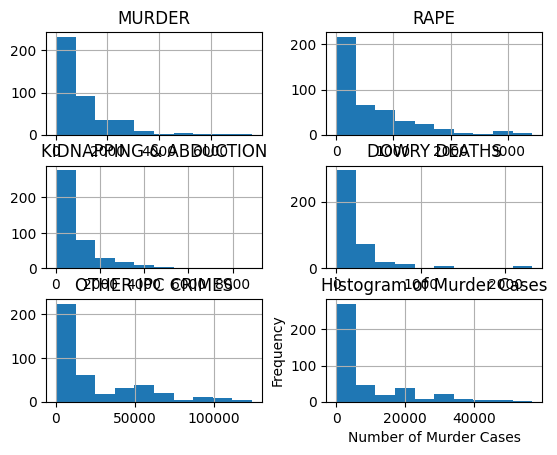

In [9]:
import matplotlib.pyplot as plt

# Histogram for the 'MURDER' column
case=['MURDER','RAPE','KIDNAPPING & ABDUCTION','DOWRY DEATHS','OTHER IPC CRIMES','HURT/GREVIOUS HURT']
data[case].hist()
plt.title('Histogram of Murder Cases')
plt.xlabel('Number of Murder Cases')
plt.ylabel('Frequency')
plt.show()



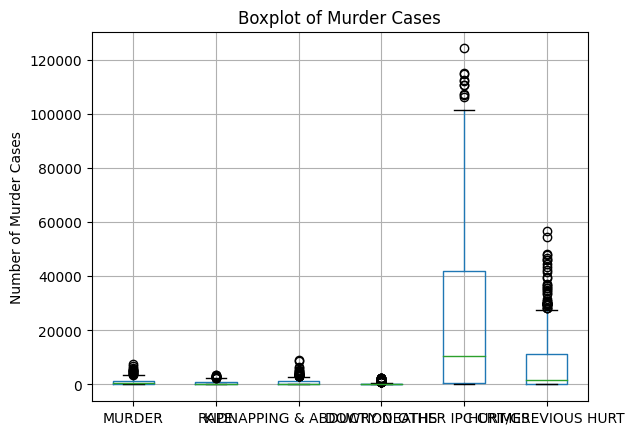

In [10]:
# Boxplot for the 'MURDER' column

case=['MURDER','RAPE','KIDNAPPING & ABDUCTION','DOWRY DEATHS','OTHER IPC CRIMES','HURT/GREVIOUS HURT']
data.boxplot(column=case)
plt.title('Boxplot of Murder Cases')
plt.ylabel('Number of Murder Cases')
plt.show()


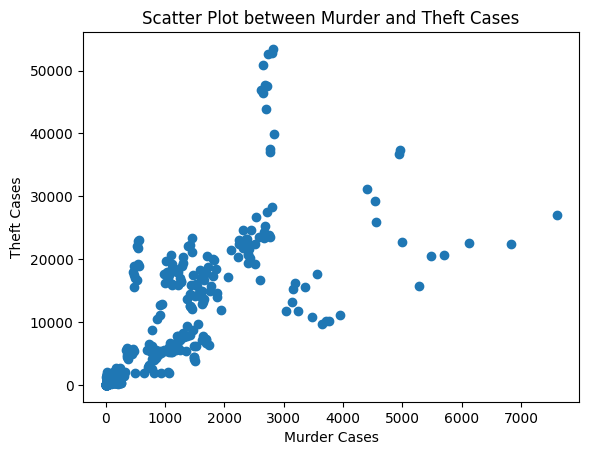

In [ ]:
# Scatter plot between 'MURDER' and 'THEFT'
plt.scatter(data['MURDER'], data['THEFT'])
plt.title('Scatter Plot between Murder and Theft Cases')
plt.xlabel('Murder Cases')
plt.ylabel('Theft Cases')
plt.show()

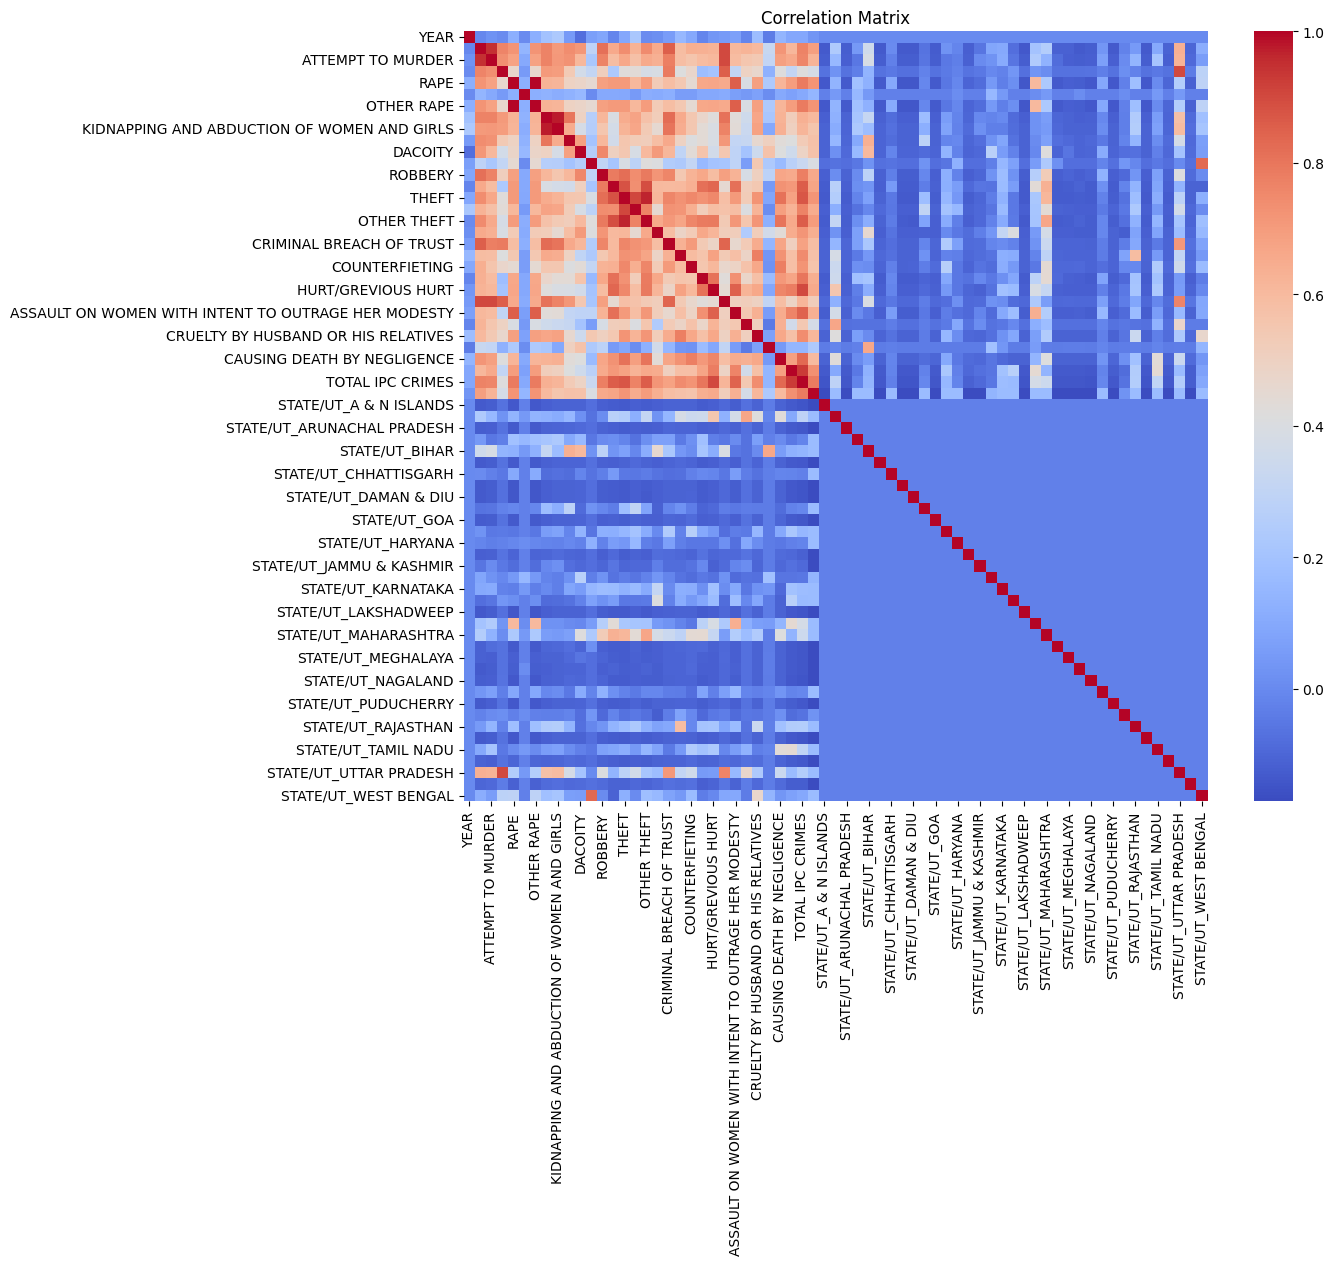

In [ ]:
# One-hot encode the 'STATE/UT' column
data_encoded = pd.get_dummies(data, columns=['STATE/UT'])

# Calculate the correlation matrix
corr = data_encoded.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)  # Set annot to True if you want to see the correlation values
plt.title('Correlation Matrix')
plt.show()

## RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating a binary target based on the median of 'TOTAL IPC CRIMES'
data['High_Crime'] = data['TOTAL IPC CRIMES'] > data['TOTAL IPC CRIMES'].median()

# Features and target
X = data.drop(['STATE/UT', 'YEAR', 'TOTAL IPC CRIMES', 'High_Crime'], axis=1)
y = data['High_Crime']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)


# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        48

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



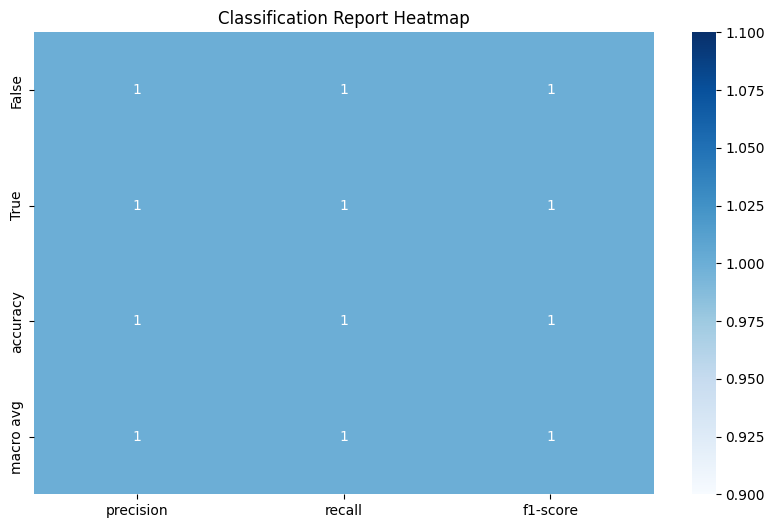

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting a heatmap for the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].drop(['support'], axis=1).astype(float), annot=True, cmap="Blues")
plt.title('Classification Report Heatmap')
plt.show()


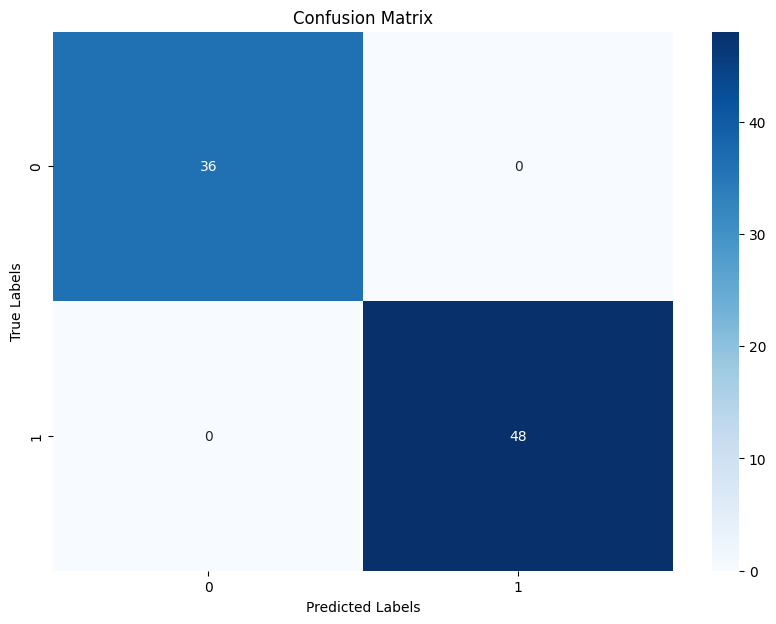

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from the previous model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


data['High_Crime'] = data['TOTAL IPC CRIMES'] > data['TOTAL IPC CRIMES'].median()

# Features and target
X = data.drop(['STATE/UT', 'YEAR', 'TOTAL IPC CRIMES', 'High_Crime'], axis=1)
y = data['High_Crime']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

       False       0.97      1.00      0.99        36
        True       1.00      0.98      0.99        48

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



## DecisionTreeClassifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd



# Creating a binary classification target
data['High_Crime'] = data['TOTAL IPC CRIMES'] > data['TOTAL IPC CRIMES'].median()

# Features and target
X = data.drop(['STATE/UT', 'YEAR', 'TOTAL IPC CRIMES', 'High_Crime'], axis=1)
y = data['High_Crime']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

       False       0.97      1.00      0.99        36
        True       1.00      0.98      0.99        48

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

